In [229]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import math

In [230]:
lunch_dict = {
    'PO': 'Papa Oros',
    'FH': 'FH Kantine',
    'KA': 'Kantina',
    'SW': 'Subway',
    'MI': 'Migros',
    'CO': 'Coop',
    'KE': 'Kebap',
    'DA': 'Dampfschiff',
    'KU': 'Kugis',
    'NÜ': 'Nüt',
    'EG': 'EG bar (nur Bier)'
}

resti = {
    'lunch_at': ['PO', 'FH', 'KA', 'SW', 'MI', 'CO', 'KE', 'DA', 'KU', 'NÜ', 'EG'],
    'weights': [1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1]
}

df_lunch = pd.DataFrame.from_dict(resti)
df_lunch

,lunch_at,weights
0,PO,1
1,FH,3
2,KA,2
3,SW,2
4,MI,2
5,CO,2
6,KE,1
7,DA,2
8,KU,1
9,NÜ,1


In [231]:
# R is the radius
def circ(R):
    x_list = []
    y_list=[]
    for x in range(-R,R+1):
        Y = int((R*R-x*x)**0.5) # bound for y given x
        for y in range(-Y,Y+1):
            x_list.append(x)
            y_list.append(y)
    return x_list, y_list

#x, y = circ(4)
#plt.scatter(x, y)
#plt.show()

In [232]:
# less point on circle grid
def dart_points():
    a = 10
    b = 3
    r1 = 2
    r2 = 1

    #The lower this value the higher quality the circle is with more points generated
    stepSize1 = 0.8
    stepSize2 = 1.57

    #Generated vertices
    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((r1 * math.cos(t) + a, r1 * math.sin(t) + b))
        t += stepSize1
    t = 0
    while t < 2 * math.pi:
        positions.append((r2 * math.cos(t) + a, r2 * math.sin(t) + b))
        t += stepSize2
    # middle
    positions.append((a, b))
    df_positions = pd.DataFrame(positions)
    df_positions = df_positions.rename(columns={0:'x', 1:'y'})

    return df_positions

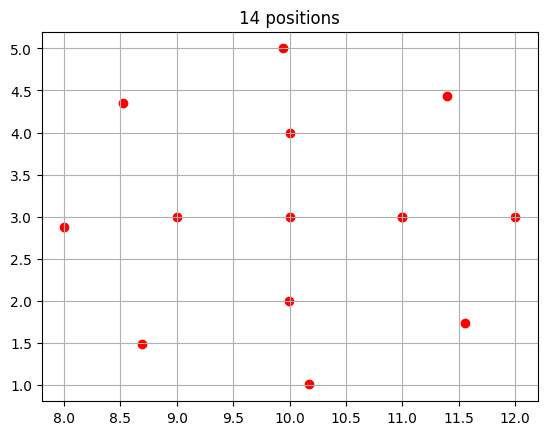

In [233]:
positions = dart_points()

plt.scatter(positions['x'], positions['y'], color='red')
plt.title(f'{len(positions.x)} positions')
plt.grid()
plt.show()

In [234]:
def get_df_locations(df):
    df_len = len(df)
    positions = dart_points()

    # get sample possitions based on len(df)
    positions = positions.sample(df_len, replace=False).reset_index(drop=True)

    # join df's
    df_lunch_location = pd.concat([df, positions], axis=1)
    df_lunch_location['weights'] = df_lunch_location['weights'] ** 1

    return df_lunch_location

In [235]:
def plot_dart(df_lunch_locations):
    fig = px.scatter(df_lunch_location, x='x', y='y', size='weights',
                 color='lunch_at', hover_name='lunch_at')
    fig.update_layout(yaxis_range=[0,6], xaxis_range=[7, 13],
                      height=800, width=800)
    return fig

In [236]:
df_lunch_location = get_df_locations(df_lunch)

fig = px.scatter(df_lunch_location, x='x', y='y', size='weights',
                 color='lunch_at', hover_name='lunch_at')
fig.update_layout(yaxis_range=[0,6], xaxis_range=[7, 13],
                  height=800, width=800)
fig.show()